In [2]:
import numpy as np
import matplotlib.pyplot as plt

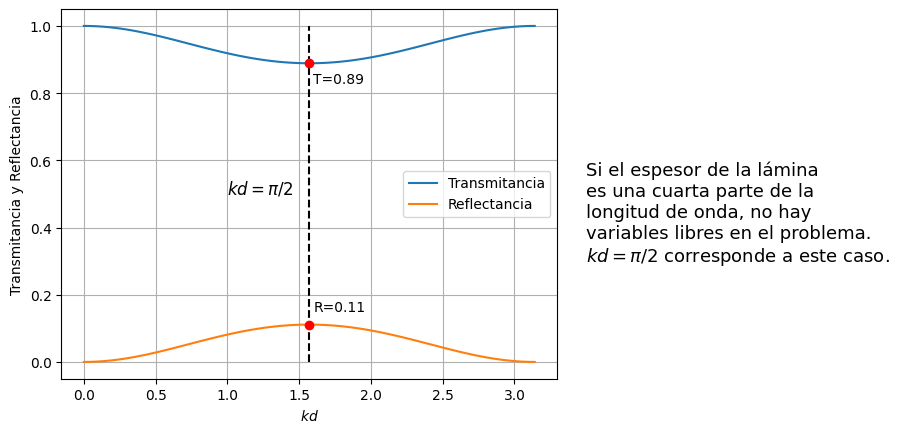

In [37]:
def matrix_trans(zi, zt):
    matrix = [[0.5*(1+zi/zt), 0.5*(1-zi/zt)],\
             [0.5*(1-zi/zt), 0.5*(1+zi/zt)]]
    return matrix


def matrix_propa(kd):
    matrix = [[np.exp(complex(0, -kd)), 0],\
             [0, np.exp(complex(0, kd))]]
    return matrix
    

T_12 = matrix_trans(1, 1/np.sqrt(2))
T_23 = matrix_trans(1, np.sqrt(2))

kd = np.linspace(0, np.pi, 100)

T = []
R = []
inpi2 = []

for ii in range (len(kd)):
    T_2 = matrix_propa(kd[ii])
    aux = np.matmul(T_12, T_2)
    matrix = np.matmul(aux, T_23)
    t = 1/(matrix[0][0])
    r = matrix[1][0]*t
    T.append(np.abs(t*t))
    R.append(np.abs(r*r))
    if (ii==int(len(kd)/2)):
        inpi2.append(np.abs(t*t))
        inpi2.append(np.abs(r*r))
    

plt.plot(kd, T, label='Transmitancia')
plt.plot(kd, R, label='Reflectancia')
plt.vlines(np.pi/2, 0, 1, colors='black', linestyles='dashed')
plt.plot([np.pi/2, np.pi/2], inpi2, "ro", )
plt.text(1,0.5,"$kd = \pi /2$", fontsize=12)
plt.text(1.6, 0.83, f"T={inpi2[0]:.2f}")
plt.text(1.6, 0.15, f"R={inpi2[1]:.2f}")
plt.text(3.5,0.3, "Si el espesor de la lámina" 
         "\n"
         "es una cuarta parte de la"
         "\n"
         "longitud de onda, no hay"
         "\n"
         "variables libres en el problema."
         "\n"
         r"$kd=\pi/2$ corresponde a este caso.", fontsize=13)
plt.xlabel(r'$kd$')
plt.ylabel('Transmitancia y Reflectancia')
plt.grid()
plt.legend()
plt.savefig("Graficas2.png",bbox_inches="tight")
plt.show()